In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

C:\Users\test\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


$\Large\text{Data load}$

In [2]:
path_folder = 'TOP4040/'

In [3]:
folder = Path(path_folder)

In [4]:
data = np.load(path_folder + '3.npz')['arr_0']

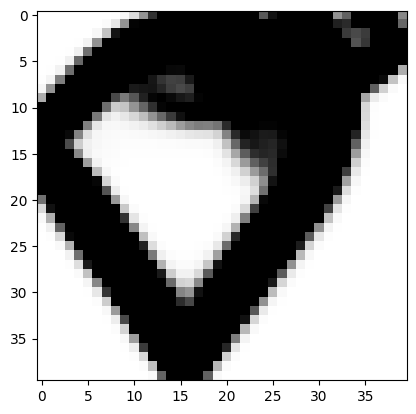

In [5]:
plt.imshow(data[6], cmap='Greys')

$\Large\text{Examples of tensor usage}$

In [6]:
x = torch.rand(6,6)
x

tensor([[0.3379, 0.7053, 0.1989, 0.5653, 0.5676, 0.6419],
        [0.2074, 0.1440, 0.6232, 0.8236, 0.9589, 0.0753],
        [0.1030, 0.9998, 0.0986, 0.6015, 0.2457, 0.1290],
        [0.0970, 0.7292, 0.0104, 0.3858, 0.3182, 0.0178],
        [0.8260, 0.6791, 0.1340, 0.9659, 0.9073, 0.2480],
        [0.8795, 0.5652, 0.9308, 0.7795, 0.2516, 0.2577]])

In [7]:
x.view(36)

tensor([0.3379, 0.7053, 0.1989, 0.5653, 0.5676, 0.6419, 0.2074, 0.1440, 0.6232,
        0.8236, 0.9589, 0.0753, 0.1030, 0.9998, 0.0986, 0.6015, 0.2457, 0.1290,
        0.0970, 0.7292, 0.0104, 0.3858, 0.3182, 0.0178, 0.8260, 0.6791, 0.1340,
        0.9659, 0.9073, 0.2480, 0.8795, 0.5652, 0.9308, 0.7795, 0.2516, 0.2577])

In [8]:
x.view(3,12)

tensor([[0.3379, 0.7053, 0.1989, 0.5653, 0.5676, 0.6419, 0.2074, 0.1440, 0.6232,
         0.8236, 0.9589, 0.0753],
        [0.1030, 0.9998, 0.0986, 0.6015, 0.2457, 0.1290, 0.0970, 0.7292, 0.0104,
         0.3858, 0.3182, 0.0178],
        [0.8260, 0.6791, 0.1340, 0.9659, 0.9073, 0.2480, 0.8795, 0.5652, 0.9308,
         0.7795, 0.2516, 0.2577]])

In [9]:
x.view(-1, 12) # -1 , python automatically calculate the size

tensor([[0.3379, 0.7053, 0.1989, 0.5653, 0.5676, 0.6419, 0.2074, 0.1440, 0.6232,
         0.8236, 0.9589, 0.0753],
        [0.1030, 0.9998, 0.0986, 0.6015, 0.2457, 0.1290, 0.0970, 0.7292, 0.0104,
         0.3858, 0.3182, 0.0178],
        [0.8260, 0.6791, 0.1340, 0.9659, 0.9073, 0.2480, 0.8795, 0.5652, 0.9308,
         0.7795, 0.2516, 0.2577]])

In [10]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [11]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [12]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
a.add_(5)
a

tensor([6., 6., 6., 6., 6.])

In [14]:
b

array([6., 6., 6., 6., 6.], dtype=float32)

In [15]:
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [16]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [17]:
type(x[0].item())

float

$\Large\text{Gradient calculation with autograd}$

In [18]:
x = torch.randn(3, requires_grad = True)
x

tensor([-0.4192, -0.5973,  0.7537], requires_grad=True)

In [19]:
y = x + 2
y

tensor([1.5808, 1.4027, 2.7537], grad_fn=<AddBackward0>)

In [20]:
z = y**2*2
# z = z.mean()

In [21]:
# z.backward() #dz/dx
# print(x.grad)

In [22]:
# What if we dont specify z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # in the backward it is vector jacobian product
print(x.grad) 

tensor([0.6323, 5.6108, 0.0110])


In [23]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [24]:
x.requires_grad_(False) # Whenever our function has _ at the end it means that is modified our variable inplace
x # Now x does not have requires_grad=True
# The same will be with y = x.detach()
# with torch.no_grad():
#    y = x + 2 

tensor([-0.4192, -0.5973,  0.7537])

$\text{Whenever we call backward function then the gradient for this tensor will be accumulated into the dot grad attribute, the values will be summed up}$ 

In [25]:
weights = torch.ones(4 , requires_grad=True)

$\text{Before we do the next iteration or optimiztion we must empty the gradients}$

In [26]:
for epoch in range(4):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # Empty 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [27]:
#With optimization

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

$\Large\text{Backpropagation}$

In [28]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad = True)


In [29]:
#forward pass and compute the loss

In [30]:
y_hat = w*x
loss = (y_hat- y) **2
loss

tensor(1., grad_fn=<PowBackward0>)

In [31]:
# Backward pass
loss.backward()
w.grad

tensor(-2.)

$\text{Next we have to update our weights and next forward and backkward}$

$\Large\text{Gradient Descent with Autograd and Backpropagation}$

$\text{Manually}$

In [32]:
def forward(x):
    
    return w * x

In [33]:
def loss(y, y_pred):
    
    return ((y - y_pred)**2).mean()

In [34]:
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y, y_pred):
    
    return np.dot(2*x, y_pred - y).mean()

In [35]:
gradient(np.array([1,2,3]), np.array([2,4,8]), np.array([2,4,10]))

12.0

In [36]:
loss(np.array([2,4,8]), np.array([2,4,10]))

1.3333333333333333

In [37]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 5.000


In [38]:
learning_rate = 0.01
n_iters = 10

In [39]:
X = np.array(list(range(1,5)), dtype = np.float32)
Y = X.copy()*2
w = 0.0

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    dw = gradient(X,Y, y_pred)
    
    #update weights
    
    w = w - learning_rate*dw
    
    if epoch%1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        


epoch 1: w = 1.200, loss = 30.00000000, dw = -120.0
epoch 2: w = 1.680, loss = 4.79999924, dw = -47.999996185302734
epoch 3: w = 1.872, loss = 0.76800019, dw = -19.200002670288086
epoch 4: w = 1.949, loss = 0.12288000, dw = -7.679999828338623
epoch 5: w = 1.980, loss = 0.01966083, dw = -3.072002649307251
epoch 6: w = 1.992, loss = 0.00314574, dw = -1.2288014888763428
epoch 7: w = 1.997, loss = 0.00050331, dw = -0.4915158748626709
epoch 8: w = 1.999, loss = 0.00008053, dw = -0.1966094970703125
epoch 9: w = 1.999, loss = 0.00001288, dw = -0.07864165306091309
epoch 10: w = 2.000, loss = 0.00000206, dw = -0.03145551681518555


In [40]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 9.999


$\text{Gradients computation with Autograd}$

In [41]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = X*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 20
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad(): 
        w-= w.grad*learning_rate
    # zero gradients
    w.grad.zero_()
    if epoch%2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000, dw = -0.03145551681518555
epoch 3: w = 0.772, loss = 15.66018772, dw = -0.03145551681518555
epoch 5: w = 1.113, loss = 8.17471695, dw = -0.03145551681518555
epoch 7: w = 1.359, loss = 4.26725292, dw = -0.03145551681518555
epoch 9: w = 1.537, loss = 2.22753215, dw = -0.03145551681518555
epoch 11: w = 1.665, loss = 1.16278565, dw = -0.03145551681518555
epoch 13: w = 1.758, loss = 0.60698116, dw = -0.03145551681518555
epoch 15: w = 1.825, loss = 0.31684780, dw = -0.03145551681518555
epoch 17: w = 1.874, loss = 0.16539653, dw = -0.03145551681518555
epoch 19: w = 1.909, loss = 0.08633806, dw = -0.03145551681518555
Prediction before training: f(5) = 9.612


$\text{Examples from the videos}$

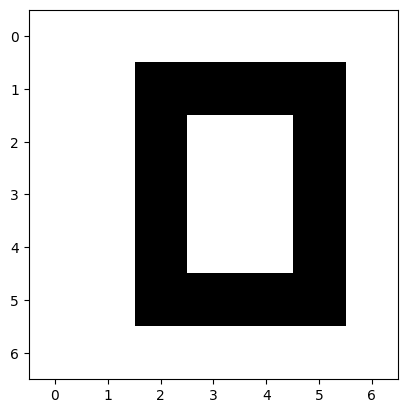

In [42]:
zero = np.zeros((7,7), dtype = np.int32)

zero[1:-1, 2::3] = 1
zero[1:-1:4, 2:-1] = 1


plt.imshow(zero , cmap = 'Greys')

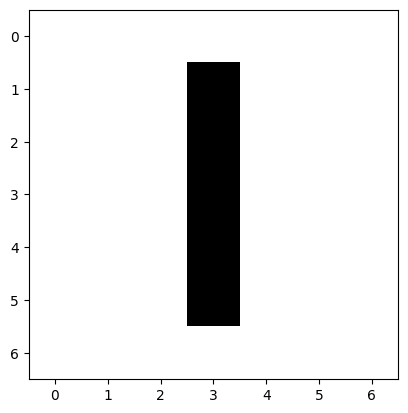

In [43]:
one = np.zeros((7,7), dtype = np.int32)
one[1:-1,3] = 1
plt.imshow(one , cmap = 'Greys')

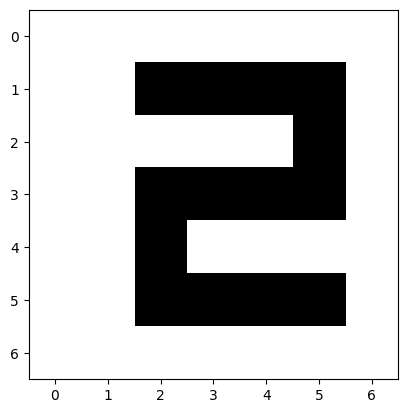

In [44]:
two = np.zeros((7,7), dtype = np.int32)

two[1:-1, 2] = 1
two[1:-1:2, 2:-1] = 1
two[2, 2] = 0
two[2, -2] = 1



plt.imshow(two , cmap = 'Greys')

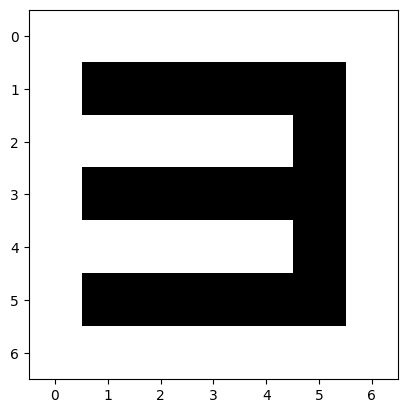

In [45]:
three = np.zeros((7,7), dtype = np.int32)

three[1:-1, -2] = 1
three[1:-1:2, 1:-2] = 1

plt.imshow(three , cmap = 'Greys')

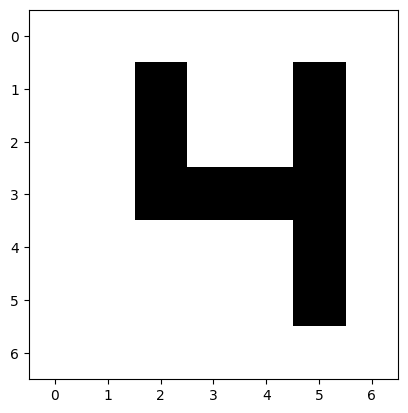

In [46]:
four = np.zeros((7,7), dtype = np.int32)

four[1:4, 2:-1:3] = 1
four[3, 2:-1] = 1
four[3 :-1, -2] = 1
# four[1:-1:2, 1:-2] = 1

plt.imshow(four , cmap = 'Greys')

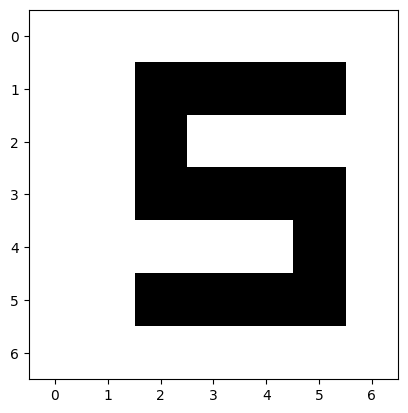

In [47]:
five = np.zeros((7,7), dtype = np.int32)

five[1:-1, 2] = 1
five[1:-1:2, 2:-1] = 1
five[-3, -2] = 1
five[-3, 2] = 0


plt.imshow(five , cmap = 'Greys')

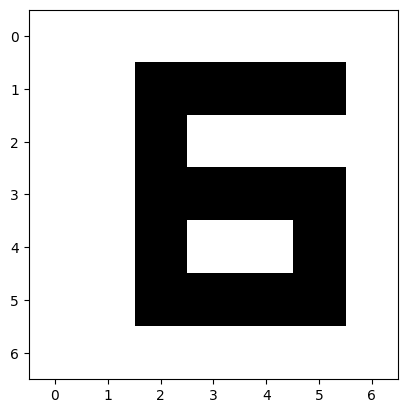

In [48]:
six = np.zeros((7,7), dtype = np.int32)

six[1:-1, 2] = 1
six[1:-1:2, 2:-1] = 1
six[-3, -2] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(six , cmap = 'Greys')

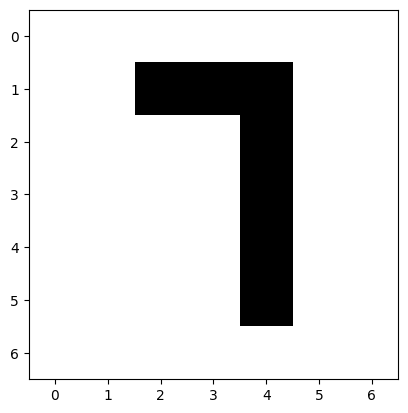

In [49]:
sev = np.zeros((7,7), dtype = np.int32)

sev[1:-1, -3] = 1
sev[1, 2:-3] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(sev , cmap = 'Greys')

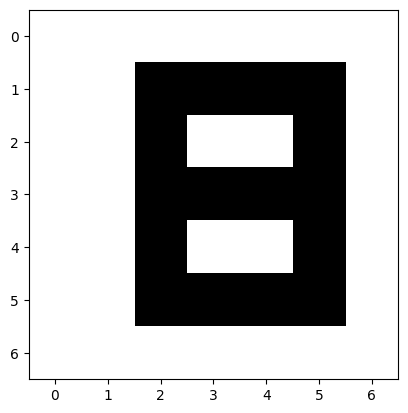

In [50]:
eig = np.zeros((7,7), dtype = np.int32)

eig[1:-1, 2::3] = 1
eig[1:-1:2, 2:-1] = 1


plt.imshow(eig , cmap = 'Greys')

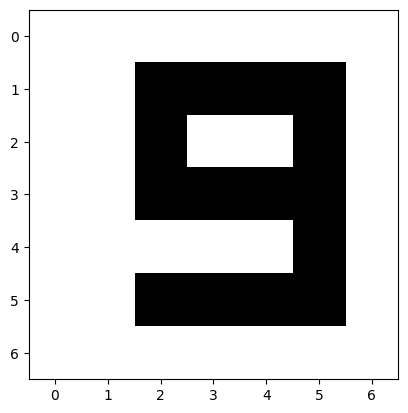

In [51]:
nine = np.zeros((7,7), dtype = np.int32)

nine[1:-1, 2] = 1
nine[1:-1:2, 2:-1] = 1
nine[-3, -2] = 1
nine[-3, 2] = 0
nine[2, -2] = 1

plt.imshow(nine , cmap = 'Greys')

In [52]:
import random

In [53]:
def relu(t):
    return np.maximum(t,0)

def softmax(t):
    
    out = np.exp(t)
    return out/np.sum(out)

def sparse_cross_entropy(z,y):
    return -np.log(z[0,y])


def relu_deriv(t):
    
    return (t >= 0).astype(float)

def predict(x):
    if x.shape[0] != 1:
        x = x.reshape(1,-1)
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax(t2)
    return z

def cals_accuracy(cur_set):
    correct = 0
    
    for x,y in cur_set:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(cur_set)
    return acc

def to_full(y, num_classes):
    y_full = np.zeros((1,num_classes))
    
    y_full[0,y] = 1
    
    return y_full

In [54]:
from sklearn import datasets

In [55]:
iris = datasets.load_iris()

In [56]:
print(iris.get('target').shape)
print(iris.data[0].shape)
print(iris.data[0][None, ...].shape) # [None, ...] from (4,) to (1, 4 ) 

(150,)
(4,)
(1, 4)


In [57]:
dataset = [(iris.data[i].reshape(1,-1), iris.target[i]) for i in range(len(iris.target))]
dataset[:5]

[(array([[5.1, 3.5, 1.4, 0.2]]), 0),
 (array([[4.9, 3. , 1.4, 0.2]]), 0),
 (array([[4.7, 3.2, 1.3, 0.2]]), 0),
 (array([[4.6, 3.1, 1.5, 0.2]]), 0),
 (array([[5. , 3.6, 1.4, 0.2]]), 0)]

In [58]:
input_dim = 4
out_dim = 3
h_dim = 5
epoch = 100
batch_size = 50 # Hyperparameter

W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

# new initial values

W1 = (W1 - 0.5)*2 * np.sqrt(1/input_dim)
b1 = (b1 - 0.5)*2 * np.sqrt(1/input_dim)
W2 = (W2 - 0.5)*2 * np.sqrt(1/h_dim)
b2 = (b2 - 0.5)*2 * np.sqrt(1/h_dim)

In [59]:
loss_arr = []
acc = []
for ep in range(epoch):
    
    random.shuffle(dataset)
    for i in range(len(dataset)):

        x,y = dataset[i]
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,y)

        #Backward

        y_full = to_full(y, out_dim)
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
#         acc.append(cals_accuracy(dataset))

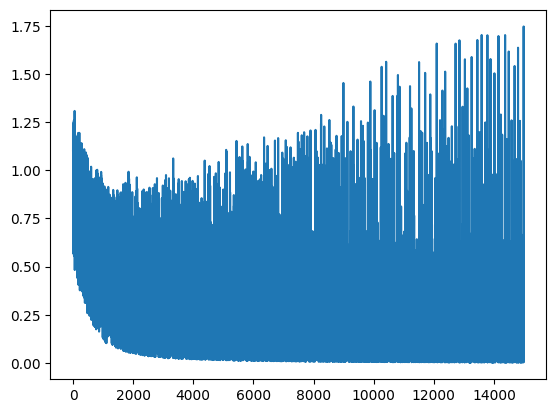

In [60]:
plt.plot(loss_arr)

In [61]:
def softmax_batch(t):
    
    out = np.exp(t)
    return out/np.sum(out, axis = 1, keepdims = True)

In [62]:
def sparse_cross_entropy_batch(z,y):
    
    return - np.log(np.array([z[j, y[j]] for j in range(len(y))]))

In [63]:
def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    
    for j, yj in enumerate(y):
        y_full[j,yj] = 1
        
    return y_full

In [64]:
loss_arr = []
arr = []
for ep in range(500):
    
    random.shuffle(dataset)
    for i in range(len(dataset) // batch_size):
        
        batch_x, batch_y = zip(*dataset[i*batch_size: (i+1)*batch_size])
        x = np.concatenate(batch_x, axis = 0)
        y = np.array(batch_y)
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)

        E = np.sum(sparse_cross_entropy_batch(z,y))

        #Backward

        y_full = to_full_batch(y, out_dim)
        
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        
        dE_db2 = np.sum(dE_dt2, axis = 0, keepdims = True)
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis = 0, keepdims = True)

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        acc.append(cals_accuracy(dataset))

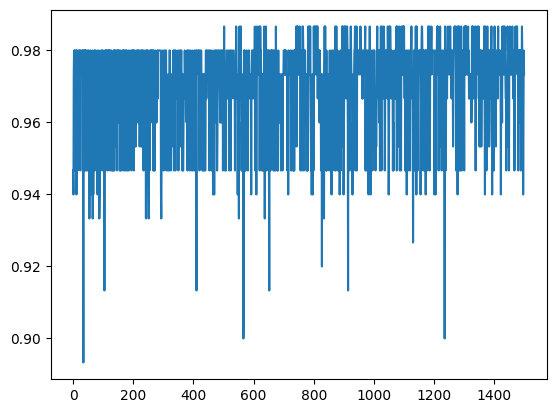

In [65]:
plt.plot(acc)

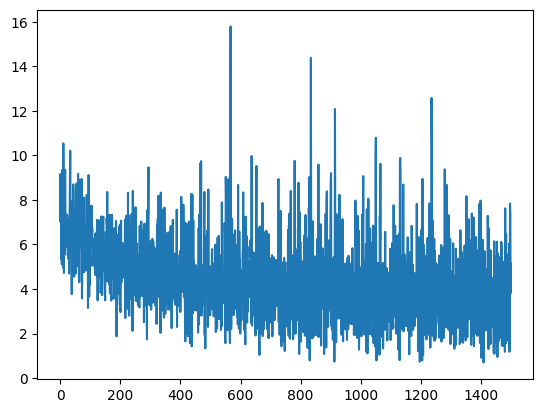

In [66]:
plt.plot(loss_arr)

In [67]:
acc[-1]

0.9733333333333334

In [68]:
curr0 = np.zeros(10, dtype = np.int32)
curr1 = np.zeros(10, dtype = np.int32)
curr2 = np.zeros(10, dtype = np.int32)
curr3 = np.zeros(10, dtype = np.int32)
curr4 = np.zeros(10, dtype = np.int32)
curr5 = np.zeros(10, dtype = np.int32)
curr6 = np.zeros(10, dtype = np.int32)
curr7 = np.zeros(10, dtype = np.int32)
curr8 = np.zeros(10, dtype = np.int32)
curr9 = np.zeros(10, dtype = np.int32)

curr0[0] = 1
curr1[1] = 1
curr2[2] = 1
curr3[3] = 1
curr4[4] = 1
curr5[5] = 1
curr6[6] = 1
curr7[7] = 1
curr8[8] = 1
curr9[9] = 1

In [69]:
digits = {
    0:[zero, curr0],
    1:[one,curr1],
    2:[two,curr2],
    3:[three,curr3],
    4:[four,curr4],
    5:[five,curr5],
    6:[six,curr6],
    7:[sev,curr7],
    8:[eig,curr8],
    9:[nine,curr9]}

In [70]:
np.maximum([1,-2,3], 0)

array([1, 0, 3])

In [71]:
input_dim = 49

h_dim = 10

out_dim = 10

In [72]:
dts = list(digits.values())

In [73]:
input_dim = 49
h_dim = 20
out_dim = 10
W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

In [74]:
loss_arr = []
arr = []
for ep in range(epoch):
    
    random.shuffle(dts)
    for i in range(len(dts)):

        x,y = dts[i]
        x = x.ravel().reshape(1,-1).copy()
        y = y.reshape(1,-1).copy()
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,np.argmax(y))

        #Backward

        y_full = y.copy()
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        y = np.argmax(y)
#         acc.append(cals_accuracy(dts))

Predicted value - 8


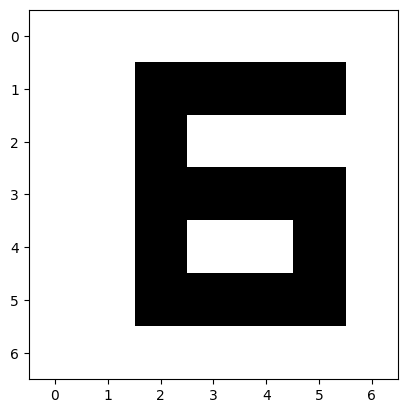

In [75]:
num = 3
plt.imshow(dts[num][0], cmap = 'binary')
print(f'Predicted value - {np.argmax(predict(dts[num][0]))}')

$\text{Gradiens computation: Autograd, Loss computation: PyTorch Loss, Parameter updates: PyTorch Optimizer}$

In [76]:
# 1) Design model (input size, output size, forward pass )
# 2) Construct loss and optimizer
# 3) Training loop

# - forward pass: compute prediction
# - backward pass: gradients
# - update weights


In [77]:
import torch.nn as nn

In [78]:
def forward(x):
    
    return w * x

In [79]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = torch.tensor(list(range(1,5)), dtype = torch.float32)*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%10 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


In [80]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

model = nn.Linear(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = -2.374


In [81]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = 0.109, loss = 50.98115540
epoch 100: w = 2.042, loss = 0.00259982
epoch 200: w = 2.031, loss = 0.00142727
epoch 300: w = 2.023, loss = 0.00078356
epoch 400: w = 2.017, loss = 0.00043017
epoch 500: w = 2.013, loss = 0.00023615
epoch 600: w = 2.009, loss = 0.00012965
epoch 700: w = 2.007, loss = 0.00007118
epoch 800: w = 2.005, loss = 0.00003907
epoch 900: w = 2.004, loss = 0.00002145
Prediction before training: f(5) = 10.006


$\text{Let's write our own model}$

In [82]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, out_dim):
        super().__init__()
        #define layers
        
        self.lin = nn.Linear(input_dim, out_dim)
        
    def forward(self, x):
        
        return self.lin(x)


In [83]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

# model = nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = -5.147


In [84]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = -0.415, loss = 73.37931824
epoch 100: w = 1.942, loss = 0.00481716
epoch 200: w = 1.957, loss = 0.00264457
epoch 300: w = 1.968, loss = 0.00145183
epoch 400: w = 1.977, loss = 0.00079704
epoch 500: w = 1.983, loss = 0.00043756
epoch 600: w = 1.987, loss = 0.00024022
epoch 700: w = 1.990, loss = 0.00013187
epoch 800: w = 1.993, loss = 0.00007240
epoch 900: w = 1.995, loss = 0.00003975
Prediction before training: f(5) = 9.992


In [85]:
from sklearn import datasets

In [86]:
#0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #reshape tensor

n_samples, n_features = X.shape

In [87]:
#1) Model

input_size = n_features
output_size = 1 # We want to have one value for each sample that we want to put in
model = nn.Linear(input_size, output_size)

In [88]:
#2)Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 10, loss = 4414.1772
epoch: 20, loss = 3291.7415
epoch: 30, loss = 2479.9441
epoch: 40, loss = 1892.1697
epoch: 50, loss = 1466.1639
epoch: 60, loss = 1157.1138
epoch: 70, loss = 932.7152
epoch: 80, loss = 769.6509
epoch: 90, loss = 651.0689
epoch: 100, loss = 564.7767


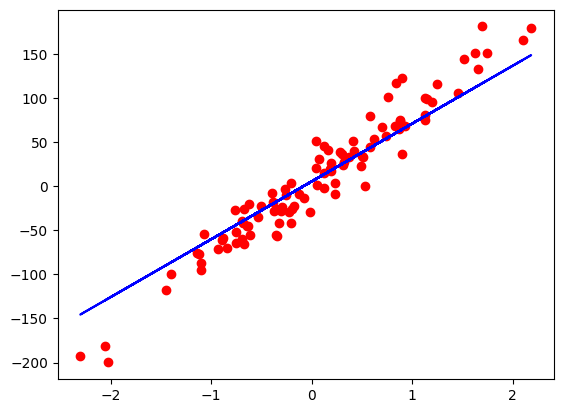

In [89]:
#3) training loop

n_epochs = 100

for ep in range(n_epochs):
    
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    #backward 
    
    loss.backward()
    
    #update
    
    optimizer.step() #update the weights
    
    optimizer.zero_grad()
    
    if (ep+1) % 10 == 0:
        
        print(f'epoch: {ep+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()  # detach() generate new tensor where our attribute required_grad is false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [91]:
#0) prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# scale 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)



569 30


In [92]:
#1) Model
# f = wx+b, sigmoid at the end

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super().__init__()
        
        self.linear = nn.Linear(n_input_features, 1)
        
        
    def forward(self, x):
        
        y_predicted = torch.sigmoid(self.linear(x))
        
        return y_predicted
    
model = LogisticRegression(n_features)

In [93]:
#2) loss and optimizer 

criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [94]:
#3) training loop

num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss 
    
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass 
    
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)  % 100 ==0:
        
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


epoch: 100, loss = 0.2413
epoch: 200, loss = 0.1751
epoch: 300, loss = 0.1456
epoch: 400, loss = 0.1282
epoch: 500, loss = 0.1165
epoch: 600, loss = 0.1080
epoch: 700, loss = 0.1015
epoch: 800, loss = 0.0963
epoch: 900, loss = 0.0920
epoch: 1000, loss = 0.0884
accuracy = 0.9298


$\Large\text{Dataset and DataLoader - Batch Training}$

In [95]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

In [96]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        self.n_samples = xy.shape[0]
        
        
    def __getitem__(self,index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)

In [98]:
batch_size = 4
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle = True) # num_workers=2 we can add 
# first_data = dataset[0]
# features, labels = first_data
# features, labels

In [99]:
# dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle = True) # num_workers=2 we can add 
# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# features, labels

In [100]:
#training loop

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / batch_size)
print(total_samples,n_iterations)

178 45


In [101]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update
        
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [102]:
# torchvision.datasets.MNIST() built-in datasets
#fashion-mnist , cifar, coco

$\Large\text{Dataset Transforms}$

In [103]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
#         self.x = torch.from_numpy(xy[:,1:])
#         self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
    
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self,index):
        # dataset[0]
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)
    

In [104]:
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [105]:
class MulTransform:
    
    def __init__(self,factor):
        self.factor = factor
        
    def __call__(self, sample):
        
        inputs, target = sample
        
        inputs *= self.factor
        
        return inputs, target

In [106]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
type(features)

torch.Tensor

In [107]:
# Compose transform

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
features, labels

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [108]:
# torch softmax 

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [109]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [110]:
input, output, output.sum(axis = 1)

(tensor([[-0.2492, -0.2957, -0.6873],
         [ 1.0145, -1.0182,  0.0956]]),
 tensor([[0.3847, 0.3672, 0.2482],
         [0.6536, 0.0856, 0.2608]]),
 tensor([1.0000, 1.0000]))

In [111]:
m = nn.Softmax(dim=0)
input = torch.randn(2, 3)
output = m(input)

In [112]:
input, output, output.sum(axis = 0)

(tensor([[ 1.9644, -1.5987,  0.2750],
         [ 0.5788, -0.6422, -1.2258]]),
 tensor([[0.7999, 0.2776, 0.8177],
         [0.2001, 0.7224, 0.1823]]),
 tensor([1.0000, 1.0000, 1.0000]))

In [113]:
def cross_entropy(actual, predicted):
    loss = - np.sum(actual * np.log(predicted))
    return loss # ideally normalize it like / float(predicted.shape[0])

# y must be one hot encoded 
# if class 0: [1, 0, 0]
# if class 1: [0, 1, 0]
# if class 2: [0, 0, 1]

In [114]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # No hot encoded
# size: n_samples * n_classes = 1 * 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.4170299470424652 1.840616226196289
tensor([0]) tensor([1])


In [115]:
loss = nn.CrossEntropyLoss()
# 3 samples
Y = torch.tensor([2,0,1]) # No hot encoded  right classes
# size: n_samples * n_classes = 3 * 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1],[0.0, 3.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1],[0.0, 3.0, 0.1]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.3002483546733856 1.6225852966308594
tensor([2, 0, 1]) tensor([0, 2, 1])


In [118]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # we can use y_pred = torch.sigmoid(out), if num_classes = 1
        # and use nn.BCELoss()
        return out
        
        

In [119]:
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies Softmax

$\text{If we use nn.BCELoss(), we use sigmoid at the end}$

In [120]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [121]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

100%|██████████| 9912422/9912422 [00:02<00:00, 4927009.95it/s]


Extracting /files/MNIST\raw\train-images-idx3-ubyte.gz to /files/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28959047.05it/s]


Extracting /files/MNIST\raw\train-labels-idx1-ubyte.gz to /files/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4417005.74it/s]


Extracting /files/MNIST\raw\t10k-images-idx3-ubyte.gz to /files/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting /files/MNIST\raw\t10k-labels-idx1-ubyte.gz to /files/MNIST\raw

